In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
df = pd.read_csv('/content/drive/MyDrive/CarPrice_Assignment.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [38]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,...,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000


In [39]:
# check for null values
df.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [40]:
# check for duplicate records
df.duplicated().sum()

0

In [41]:
from sklearn.preprocessing import LabelEncoder

# Function to encode all categorical columns into numerical representations using one-hot encoding
def encode_all_categorical_columns(df):
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Dictionary to store mappings for each column
    encoding_maps = {}

    # Apply encoding to each categorical column
    for column in categorical_columns:
        # Initialize the label encoder
        encoder = LabelEncoder()

        # Fit and transform the column
        df[column] = encoder.fit_transform(df[column])

        # Save the encoding map for each column
        encoding_maps[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

    return df, encoding_maps

# Apply encoding to all categorical columns
car_data_encoded_all, encoding_maps_all = encode_all_categorical_columns(df)


In [42]:
car_data_encoded_all.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.600,...,130,5,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,3,1,0,1,0,2,0,88.600,...,130,5,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,1,1,0,1,2,2,0,94.500,...,152,5,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,4,1,0,0,3,1,0,99.800,...,109,5,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,5,1,0,0,3,0,0,99.400,...,136,5,3.190,3.400,8.000,115,5500,18,22,17450.000


In [43]:
# Define the features (X) and target variable (y)
X = df.drop(['car_ID', 'CarName', 'price'], axis=1)
y = df['price']

In [44]:
X

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,1,0,2,0,88.600,168.800,64.100,...,2,130,5,3.470,2.680,9.000,111,5000,21,27
1,3,1,0,1,0,2,0,88.600,168.800,64.100,...,2,130,5,3.470,2.680,9.000,111,5000,21,27
2,1,1,0,1,2,2,0,94.500,171.200,65.500,...,3,152,5,2.680,3.470,9.000,154,5000,19,26
3,2,1,0,0,3,1,0,99.800,176.600,66.200,...,2,109,5,3.190,3.400,10.000,102,5500,24,30
4,2,1,0,0,3,0,0,99.400,176.600,66.400,...,1,136,5,3.190,3.400,8.000,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.100,188.800,68.900,...,2,141,5,3.780,3.150,9.500,114,5400,23,28
201,-1,1,1,0,3,2,0,109.100,188.800,68.800,...,2,141,5,3.780,3.150,8.700,160,5300,19,25
202,-1,1,0,0,3,2,0,109.100,188.800,68.900,...,3,173,5,3.580,2.870,8.800,134,5500,18,23
203,-1,0,1,0,3,2,0,109.100,188.800,68.900,...,3,145,3,3.010,3.400,23.000,106,4800,26,27


In [45]:
y

,price
0,13495.000
1,16500.000
2,16500.000
3,13950.000
4,17450.000
...,...
200,16845.000
201,19045.000
202,21485.000
203,22470.000


In [46]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Initialize and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

In [49]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [50]:
# Print the evaluation results
print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R^2): {r2}")

Linear Regression Results:
Mean Absolute Error (MAE): 2526.407450143435
Mean Squared Error (MSE): 15916389.725439414
Root Mean Squared Error: 3989.535026220401
R-squared (R^2): 0.7983838478445078


Random Forest Regression

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [52]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

In [54]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

In [55]:
# Print the evaluation results
print("Random Forest Regression Results:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R^2): {r2}")

Random Forest Regression Results:
Mean Absolute Error (MAE): 1291.502674796748
Mean Squared Error (MSE): 3326665.1861985945
Root Mean Squared Error: 1823.9147968582838
R-squared (R^2): 0.9578604541657466


Hyper Parameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# Tuning Random Forest Regression
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)

In [59]:
# fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [60]:
best_parameters = grid_search.best_params_
print("Best parameters:", best_parameters)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Visualization for MSE, RMSE and R2

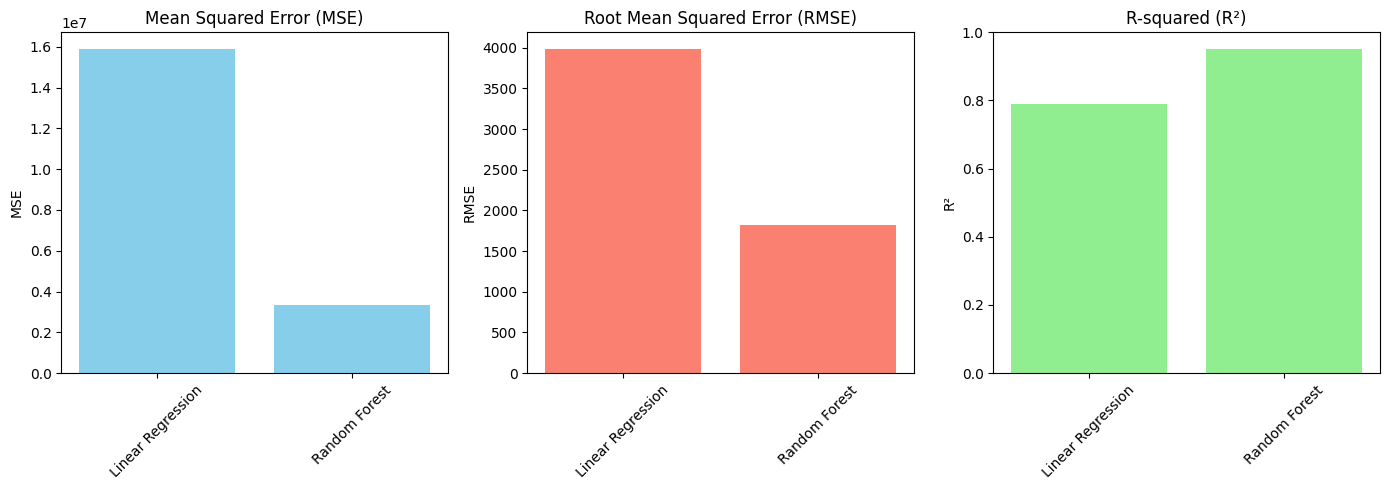

In [61]:
import matplotlib.pyplot as plt

# Data for the models
models = ['Linear Regression', 'Random Forest']
mse_values = [15916389, 3326665]
rmse_values = [3989, 1823]
r2_values = [0.79, 0.95]

# Set the figure size for all plots
plt.figure(figsize=(14, 5))

# Bar plot for Mean Squared Error (MSE)
plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Bar plot for Root Mean Squared Error (RMSE)
plt.subplot(1, 3, 2)
plt.bar(models, rmse_values, color='salmon')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# Bar plot for R-squared (R²)
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R-squared (R²)')
plt.ylabel('R²')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Adjust layout for readability
plt.tight_layout()
plt.show()


**Model Comparison Report**: Predicting Car Prices for Geely Auto's Market Entry Strategy

Objective
To develop a predictive model for car prices based on multiple independent variables. This model will help Geely Auto understand pricing dynamics in the US market and guide business and design strategy.

Models Evaluated
1. Linear Regression
2. Random Forest Regression (with tuned n_estimators, max_depth, min_samples_split, and min_samples_leaf)

Performance Metrics

| Model     | Best Parameters  | MSE | RMSE | R² |

|-------------------------------------------------------------------------------------------|

| Linear Regression|Default| 15916389 | 3989 | 0.79 |

| Random Forest    | n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=1 | 3326665 | 1823 | 0.95 |


Model Insights

1. Linear Regression:
   - Baseline model with satisfactory performance.
   - R² of 0.79 indicates it captures most of the variation but has limited flexibility with non-linear relationships.

2. Random Forest Regression:
   - Non-linear model with ensemble learning, aggregating multiple decision trees.
   - Outperforms other models with an R² of 0.95, capturing more complex relationships in the data and reducing MSE to 3326665, making it the most accurate for car price prediction.

Recommendation for Production

Based on the evaluation metrics, Random Forest Regression is the best model for production deployment. It offers the highest accuracy, capturing the non-linear relationships between features and car prices more effectively than linear models. Random Forest’s flexibility and robustness in handling varied data types and interactions make it suitable for predicting car prices in the competitive and dynamic US market.
